<a href="https://colab.research.google.com/github/Ian386/LUX_ADMY-DS-BTCMP/blob/main/Outlier_Detection_Practice_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OUTLIER DETECTION AND REMOVAL USING IQR AND QUANTILE METHODS**

---



In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**1. IQR METHOD**

In [3]:
df_weight = pd.read_csv('/content/weight-height.csv')
df_weight.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


Plot histograms based on height and weight respectively

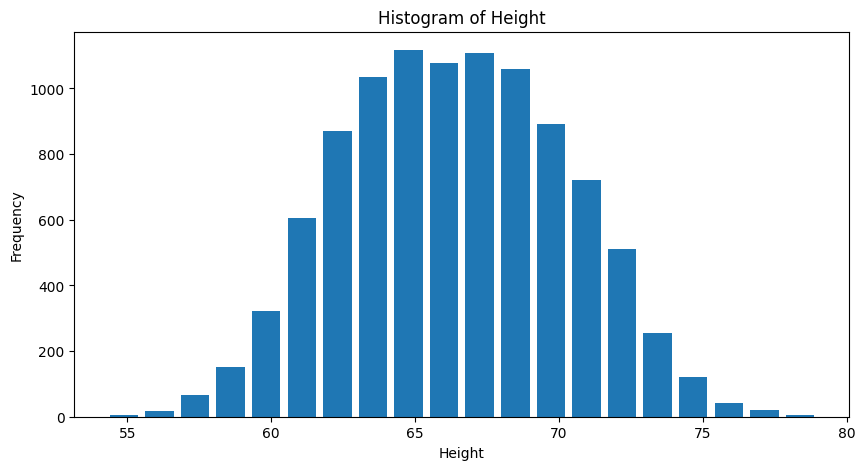

In [22]:
plt.figure(figsize=(10,5))
plt.hist(df_weight.Height, bins=20, rwidth= 0.8)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height')
plt.show()

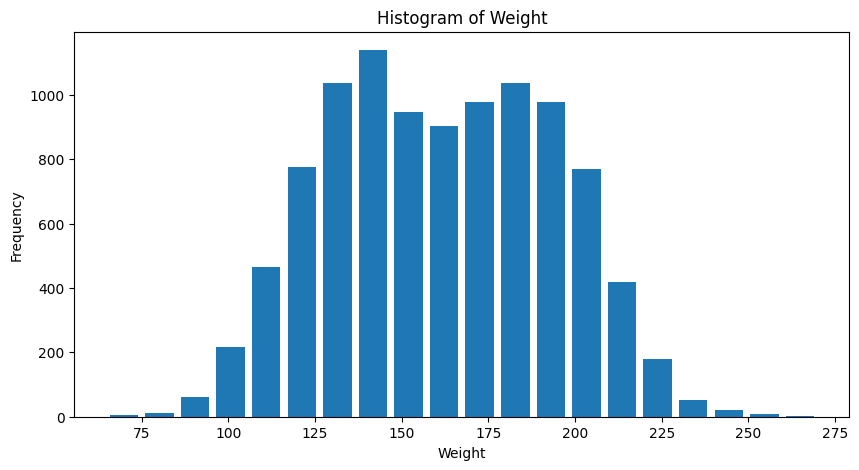

In [5]:
plt.figure(figsize=(10,5))
plt.hist(df_weight.Weight, bins=20, rwidth= 0.8)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.show()

In [6]:
df_weight.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


**Removing outliers based on weight column using IQR Method**

calculate upper and lower quantiles

In [7]:
q1 = df_weight.Weight.quantile(0.25)
q3 = df_weight.Weight.quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(135.8180513055015, 187.16952486868348, 51.35147356318197)

calculate upper and lower limit

In [8]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [9]:
df_update_weight = df_weight[(df_weight['Weight'] < upper_limit ) & (df_weight['Weight'] > lower_limit)]
df_update_weight.sample(10)

,Gender,Height,Weight
9177,Female,64.475602,137.964705
4106,Male,69.743805,186.705760
2351,Male,65.873234,174.498556
2561,Male,71.273326,209.112998
69,Male,68.896706,196.451312
7448,Female,66.819348,149.658877
1312,Male,66.097576,163.641496
2766,Male,74.400658,240.942267
7469,Female,64.673122,130.312035
7817,Female,65.872596,155.570746


In [10]:
df_weight.shape, df_update_weight.shape

((10000, 3), (9999, 3))

Remove Outliers based on Height Column using IQR Method

In [11]:
q1 = df_weight.Height.quantile(0.25)
q3 = df_weight.Height.quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(63.505620481218955, 69.1742617268347, 5.668641245615746)

In [12]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [13]:
df_update_height = df_weight[(df_weight['Height'] < upper_limit ) & (df_weight['Height'] > lower_limit)]
df_update_height.sample(10)

,Gender,Height,Weight
1559,Male,71.649917,200.677164
7161,Female,67.122422,165.324899
2667,Male,68.005429,194.754189
4691,Male,65.111116,183.862263
505,Male,70.191224,205.941791
1710,Male,68.992994,166.795209
9059,Female,69.363389,169.453824
4515,Male,65.796778,175.912288
3472,Male,65.559754,163.011692
714,Male,69.793888,181.723193


In [14]:
df_weight.shape, df_update_height.shape

((10000, 3), (9992, 3))

{'whiskers': [<matplotlib.lines.Line2D at 0x79437321c040>,
 'caps': [<matplotlib.lines.Line2D at 0x79437321c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7943731efd60>],
 'medians': [<matplotlib.lines.Line2D at 0x79437321cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79437321cd60>],
 'means': []}

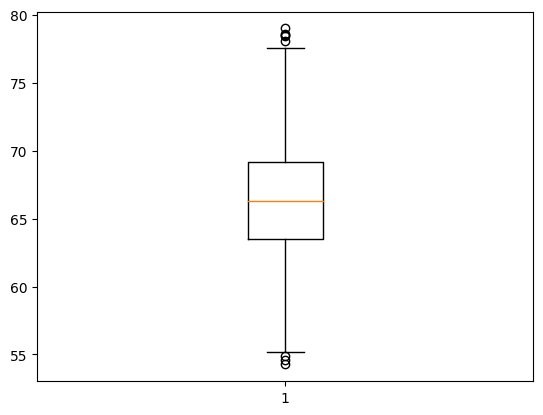

In [15]:
plt.boxplot(df_weight.Height)

{'whiskers': [<matplotlib.lines.Line2D at 0x7943732665f0>,
 'caps': [<matplotlib.lines.Line2D at 0x794373266b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7943732662c0>],
 'medians': [<matplotlib.lines.Line2D at 0x794373267070>],
 'fliers': [<matplotlib.lines.Line2D at 0x794373267310>],
 'means': []}

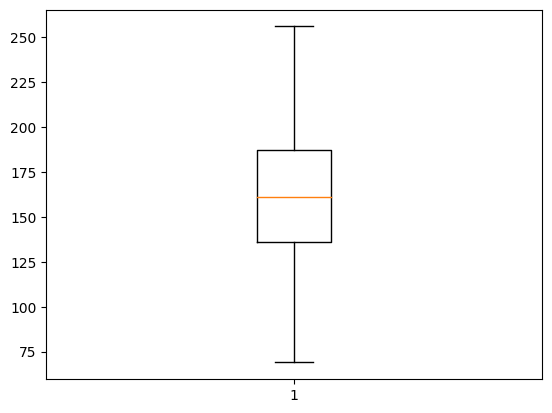

In [16]:
plt.boxplot(df_update_height.Weight)